<a href="https://colab.research.google.com/github/16sl75/business-analytics-project_2021_08_18/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Boston Housing Price Prediction

Reference:
1.https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
2.https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d
3.https://www.kaggle.com/vikrishnan/boston-house-prices
4.https://github.com/rromanss23/Machine_Leaning_Engineer_Udacity_NanoDegree/tree/master/projects/boston_housing


In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
# Import supplementary visualizations code visuals.py
import visuals as vs

#Ingestion

In [ ]:
# Load the Boston housing dataset
housing_data_with_features = []
data = pd.read_csv(r'housing.csv', header= None)

##Data Cleaning

In [ ]:
for lines in data.index:
    housing_data = data.loc[lines].values[0].split(" ")
    for elem in housing_data:
        if elem in ['']:
            housing_data.remove(elem)
    for elem in housing_data:
        if elem in ['']:
            housing_data.remove(elem)
    for elem in housing_data:
        if elem in ['']:
            housing_data.remove(elem)
    housing_data_with_features.append(housing_data)

In [ ]:
housing_data_cleaned = pd.DataFrame(housing_data_with_features)
housing_data_cleaned.to_csv('housing_features.csv', header=None)

In [ ]:
# The features can be summarized as follows:
col_names = ['CRIM',   # CRIM: This is the per capita crime rate by town
             'ZN',     # ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
             'INDUS',  # INDUS: This is the proportion of non-retail business acres per town.
             'CHAS',   # CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
             'NOX',    # NOX: This is the nitric oxides concentration (parts per 10 million)
             'RM',     # RM: This is the average number of rooms per dwelling
             'AGE',    # AGE: This is the proportion of owner-occupied units built prior to 1940
             'DIS',    # DIS: This is the weighted distances to five Boston employment centers
             'RAD',    # RAD: This is the index of accessibility to radial highways
             'TAX',    # TAX: This is the full-value property-tax rate per $10,000
             'PTRATIO',# PTRATIO: This is the pupil-teacher ratio by town
             'Black',  # B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
             'LSTAT',  # LSTAT: This is the percentage lower status of the population
             'MEDV']   # MEDV: This is the median value of owner-occupied homes in $1000s

In [ ]:
housing_data_cleaned = pd.read_csv(r'housing_features.csv', names=col_names, header=None)
print(housing_data_cleaned)
prices = housing_data_cleaned['MEDV']
features = housing_data_cleaned.drop('MEDV', axis = 1)
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

        CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO   Black  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2
..       ...   ...    ...   ...    ...  ...    ...      ...     ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...  273.0     21.0  391.99   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...  273.0     21.0  393.45   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...  273.0     21.0  396.90   7.88  11.9

[506 rows x 14 columns]
Bos

Data Exploration

In [ ]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price))
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.188011545278206


Data Visualization

<Figure size 432x288 with 0 Axes>

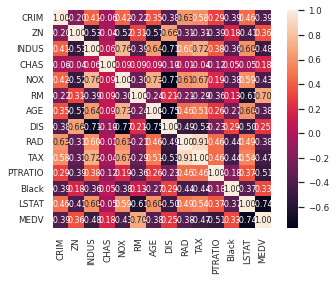

In [ ]:
# Calculate and show pairplot
#sns.pairplot(housing_data_cleaned, size=2.5)
plt.tight_layout()
plt.show()

##Correlation Matrix
# Calculate and show correlation matrix
cm = np.corrcoef(housing_data_cleaned.values.T)
sns.set(font_scale=0.8)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 8},
                yticklabels=col_names,
                xticklabels=col_names)

##EDA

Univariate Analysis

In [ ]:
housing_data_cleaned['CRIM'].value_counts()
housing_data_cleaned.loc[(housing_data_cleaned['CRIM'] == 2),['CRIM']]=2
housing_data_cleaned.loc[(housing_data_cleaned['CRIM'] == 1),['CRIM']]=1
housing_data_cleaned['CRIM'].value_counts()

14.33370    2
0.01501     2
0.08265     1
1.35472     1
0.03615     1
           ..
0.11460     1
0.03237     1
5.82115     1
0.02187     1
0.03578     1
Name: CRIM, Length: 504, dtype: int64

In [ ]:
housing_data_cleaned['ZN'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: ZN, dtype: int64

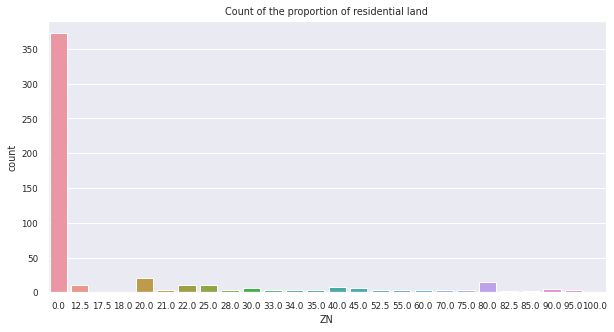

In [ ]:

plt.figure(figsize=(10,5))
ax = sns.countplot(x= housing_data_cleaned['ZN'], data=housing_data_cleaned).set_title('Count of the proportion of residential land')

In [ ]:
housing_data_cleaned['INDUS'].value_counts()

18.10    132
19.58     30
8.14      22
6.20      18
21.89     15
        ... 
1.21       1
4.15       1
2.02       1
2.01       1
4.00       1
Name: INDUS, Length: 76, dtype: int64

In [ ]:
plt.figure(figsize=(400,200))
sns.countplot(x = housing_data_cleaned['INDUS'], data=housing_data_cleaned).set_title('Count of the proportion of non-retail business acres per town')
plt.tight_layout()

In [ ]:
housing_data_cleaned['AGE'].value_counts()

100.0    43
96.0      4
98.2      4
95.4      4
97.9      4
         ..
47.6      1
92.7      1
13.9      1
58.4      1
40.1      1
Name: AGE, Length: 356, dtype: int64

In [ ]:
plt.figure(figsize=(400,200))
sns.countplot(housing_data_cleaned['AGE']).set_title('Count of the proportion of owner-occupied units built prior to 1940')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the proportion of owner-occupied units built prior to 1940')

In [ ]:
housing_data_cleaned['DIS'].value_counts()

3.4952    5
5.2873    4
5.4007    4
5.7209    4
6.8147    4
         ..
3.5549    1
4.4534    1
2.1000    1
4.0905    1
1.8125    1
Name: DIS, Length: 412, dtype: int64

In [ ]:
plt.figure(figsize=(500,250))
sns.countplot(x=housing_data_cleaned['DIS'], data = housing_data_cleaned).set_title('Count of the weighted distances to five Boston employment centers')

Text(0.5, 1.0, 'Count of the weighted distances to five Boston employment centers')

In [ ]:
housing_data_cleaned['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
8      24
2      24
1      20
7      17
Name: RAD, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the weighted distances to five Boston employment centers')

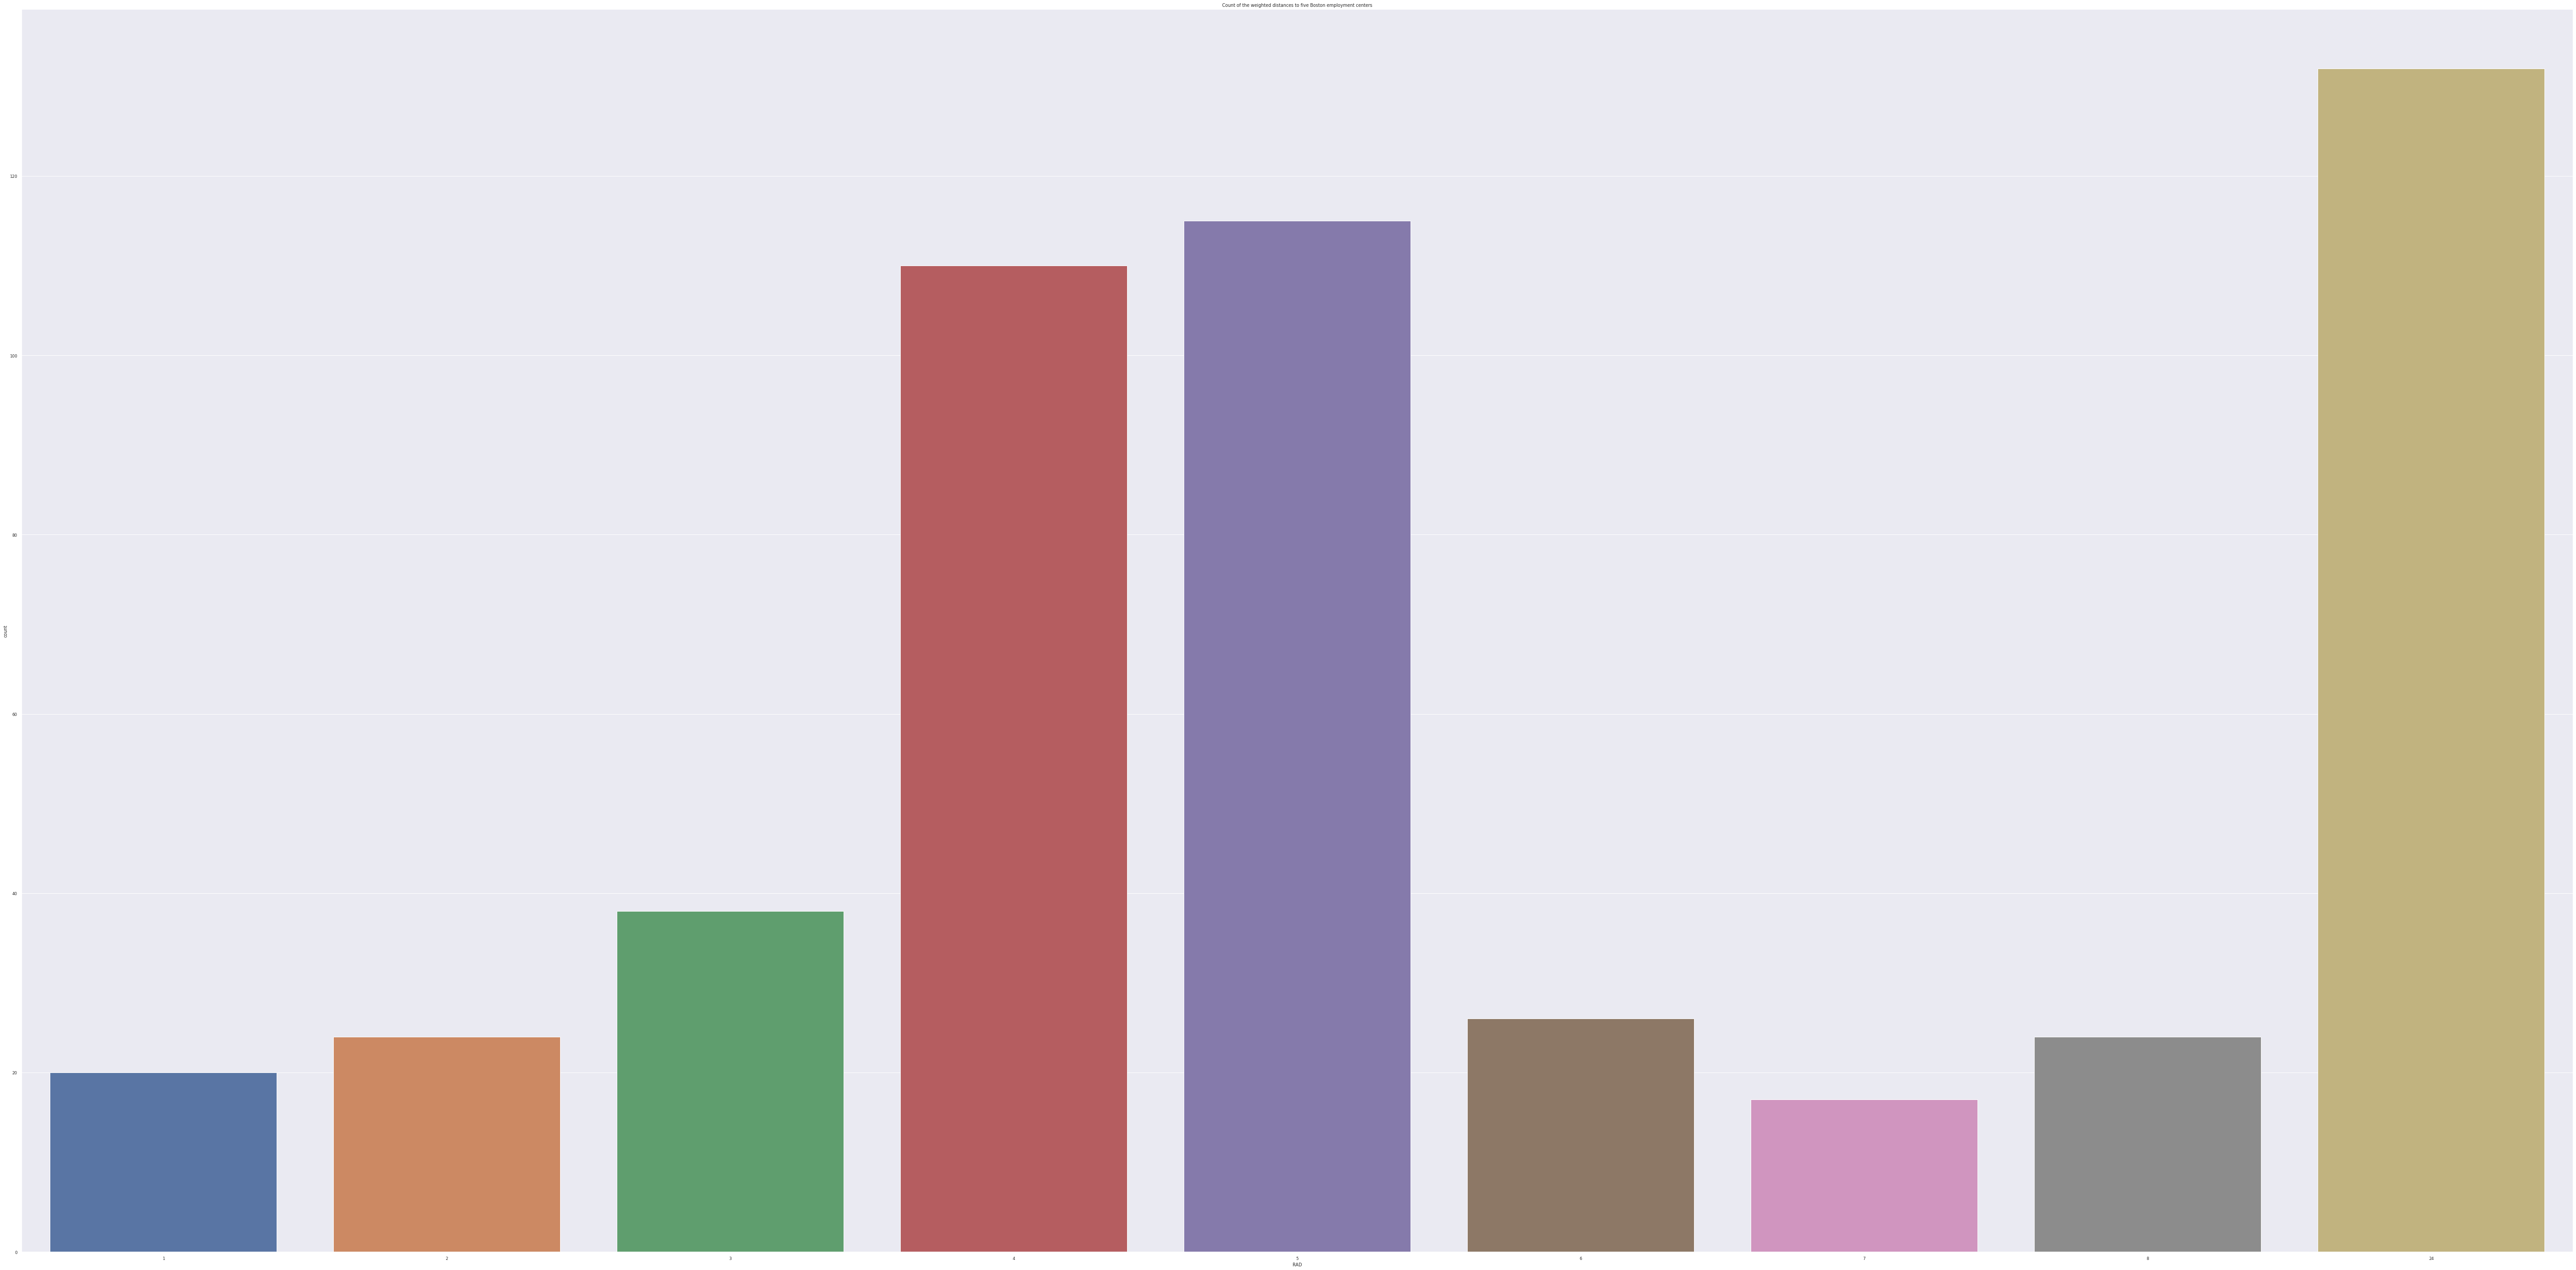

In [ ]:
plt.figure(figsize=(200,100))
sns.countplot(housing_data_cleaned['RAD']).set_title('Count of the weighted distances to five Boston employment centers')

In [ ]:
housing_data_cleaned['TAX'].value_counts()

666.0    132
307.0     40
403.0     30
437.0     15
304.0     14
        ... 
187.0      1
255.0      1
313.0      1
469.0      1
280.0      1
Name: TAX, Length: 66, dtype: int64

In [ ]:
plt.figure(figsize=(400,200))
sns.countplot(housing_data_cleaned['TAX']).set_title('Count of the full-value property-tax rate per $10,000')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the full-value property-tax rate per $10,000')

In [ ]:
housing_data_cleaned['PTRATIO'].value_counts()

20.2    140
14.7     34
21.0     27
17.8     23
19.2     19
17.4     18
18.6     17
19.1     17
16.6     16
18.4     16
21.2     15
15.2     13
13.0     12
20.9     11
17.9     11
18.7      9
19.7      8
19.6      8
17.6      7
16.4      6
18.0      5
16.0      5
20.1      5
16.1      5
16.9      5
16.8      4
14.9      4
19.0      4
18.5      4
17.0      4
18.2      4
18.3      4
12.6      3
14.8      3
18.9      3
15.3      3
15.9      2
22.0      2
15.6      2
18.8      2
15.5      1
17.3      1
15.1      1
21.1      1
13.6      1
14.4      1
Name: PTRATIO, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the pupil-teacher ratio by town')

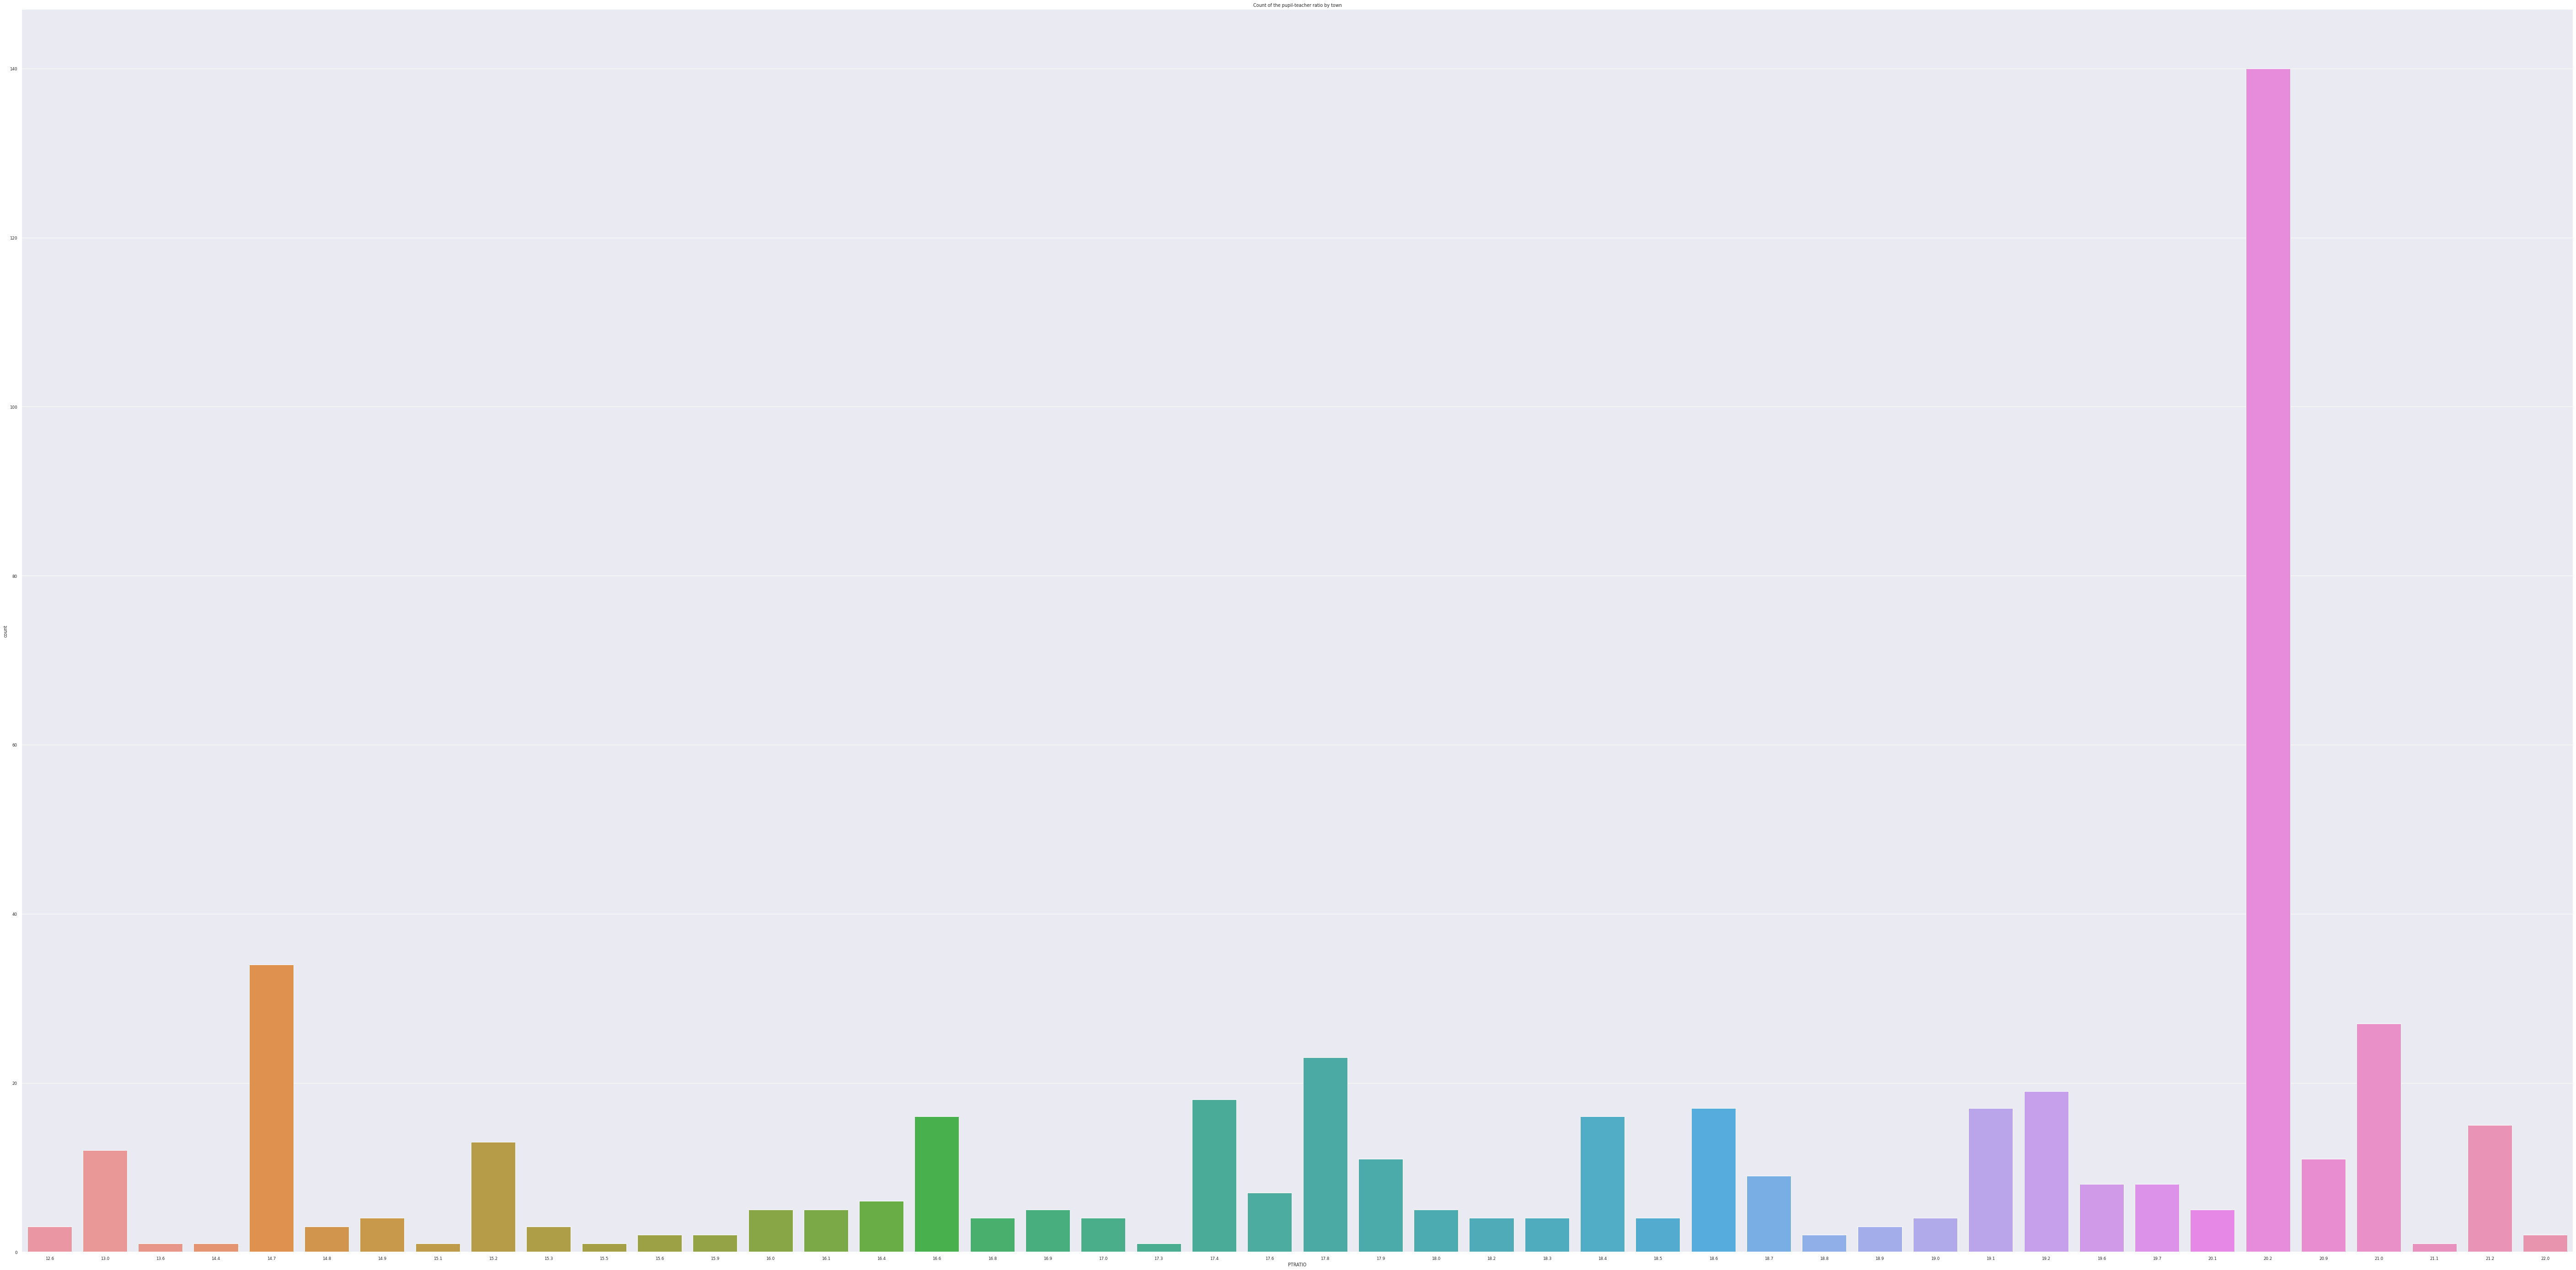

In [ ]:
plt.figure(figsize=(100,50))
sns.countplot(housing_data_cleaned['PTRATIO']).set_title('Count of the pupil-teacher ratio by town')

In [ ]:
housing_data_cleaned['Black'].value_counts()

396.90    121
395.24      3
393.74      3
393.23      2
394.72      2
         ... 
394.46      1
288.99      1
390.30      1
248.31      1
390.50      1
Name: Black, Length: 357, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the proportion of people of African American descent by town in 1000(Bk — 0.63)²')

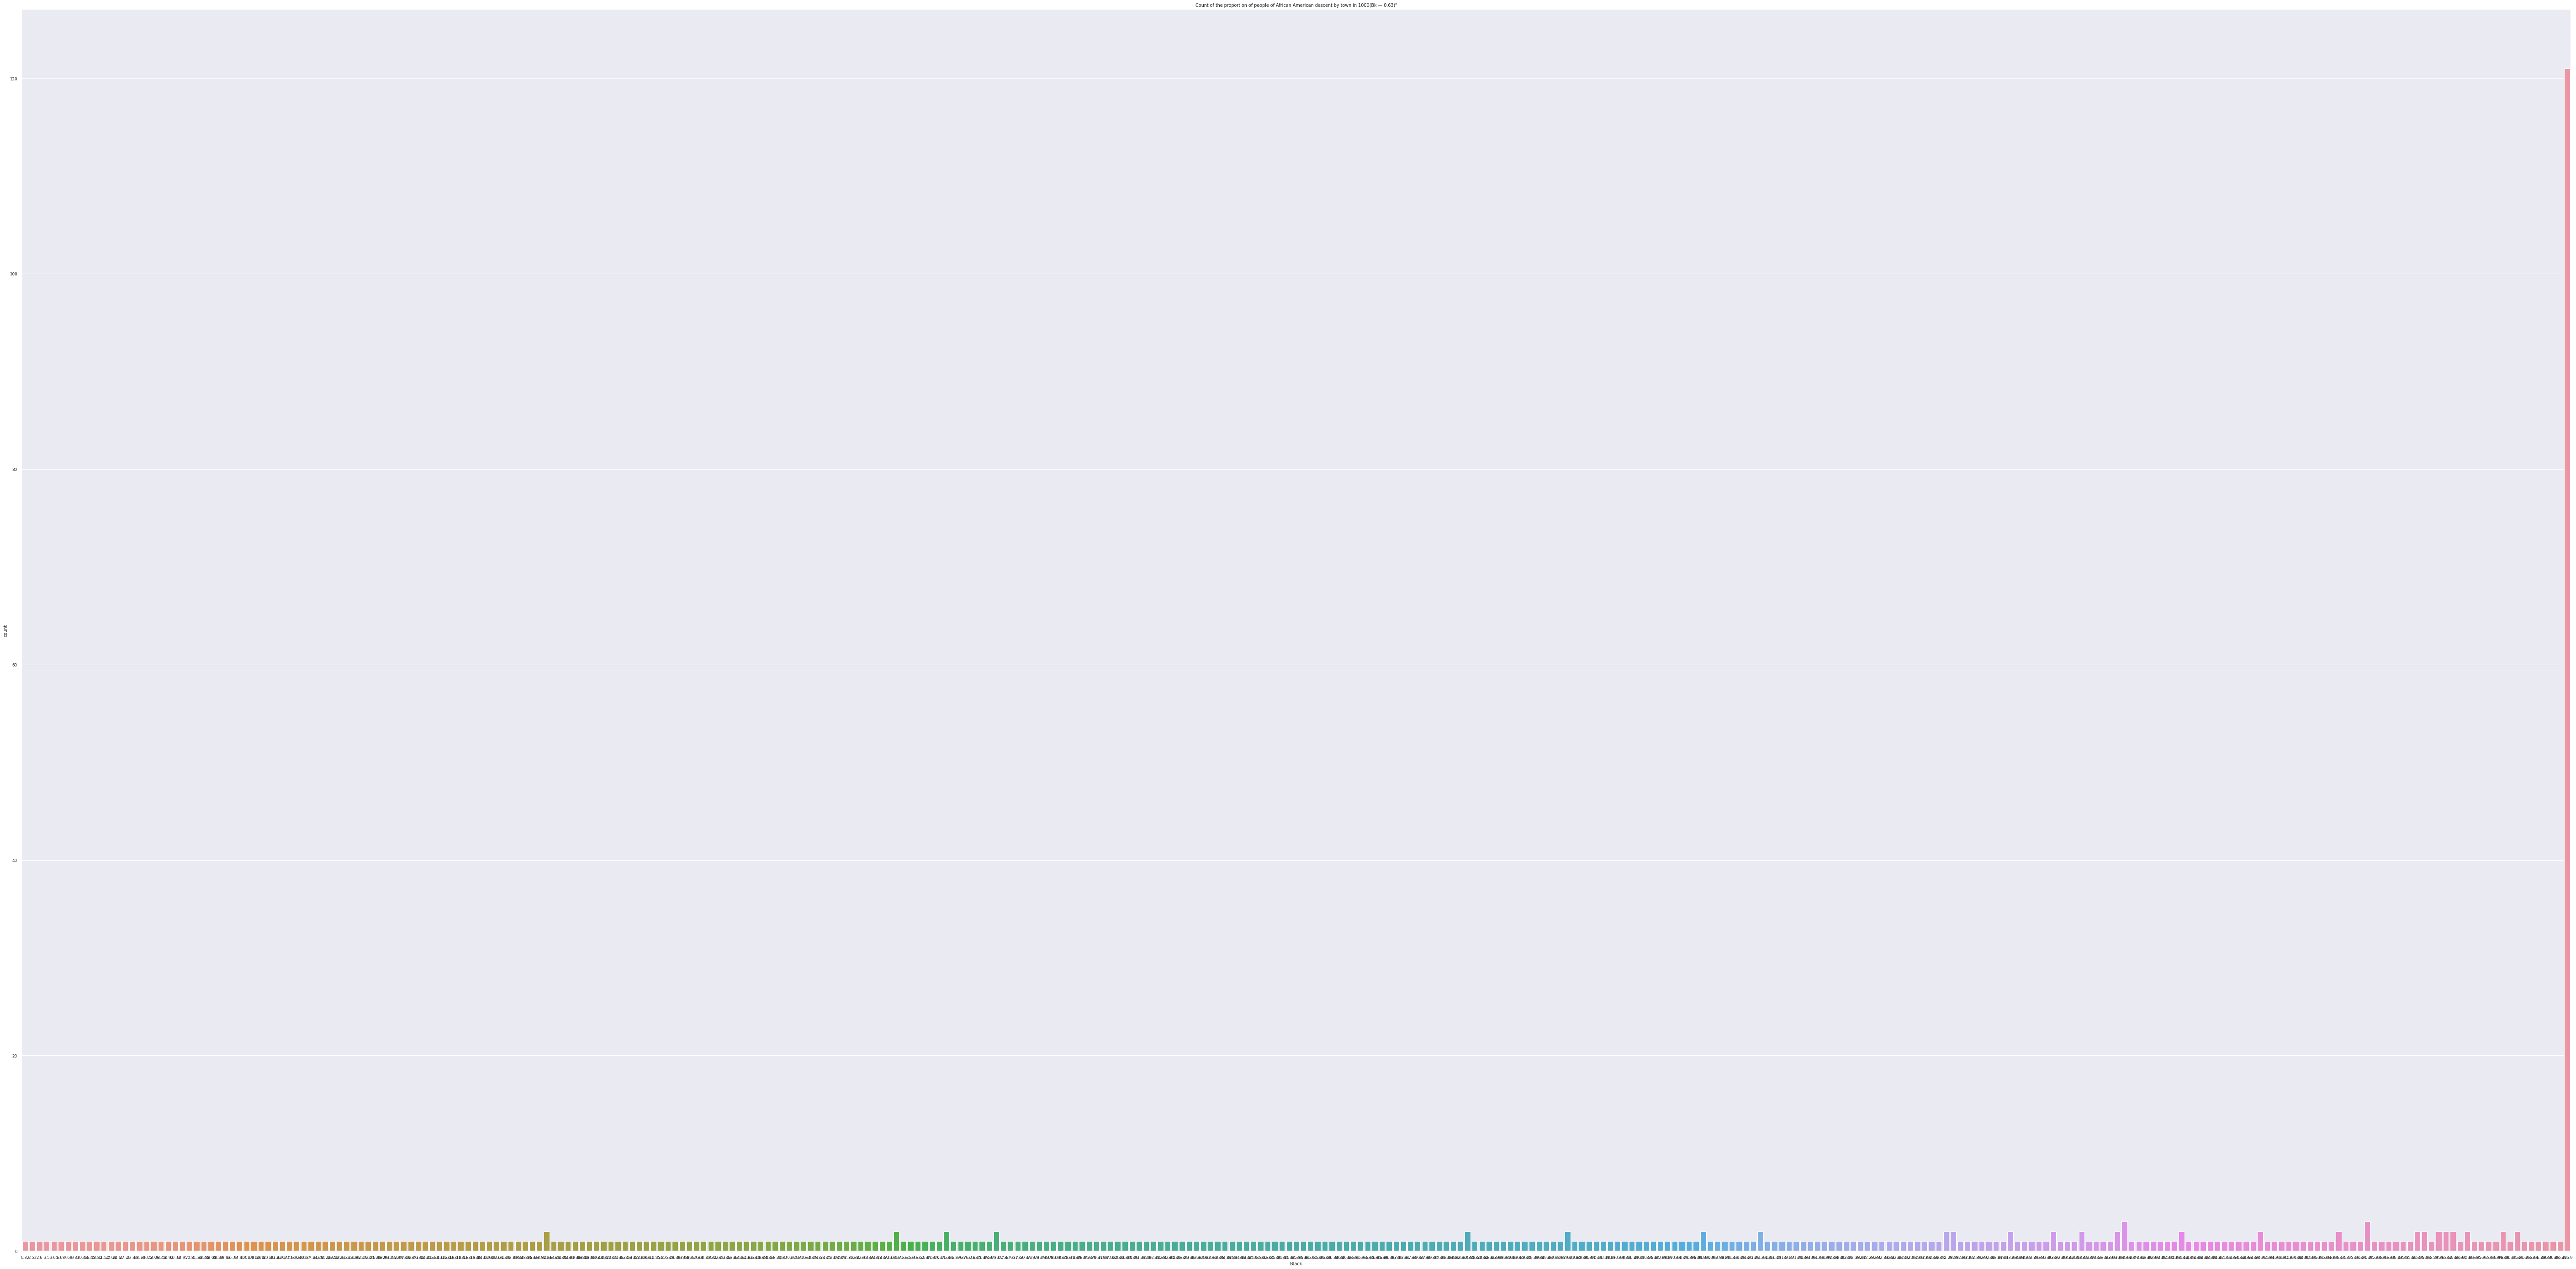

In [ ]:
plt.figure(figsize=(100,50))
sns.countplot(housing_data_cleaned['Black']).set_title('Count of the proportion of people of African American descent by town in 1000(Bk — 0.63)²')

In [ ]:
housing_data_cleaned['LSTAT'].value_counts()

14.10    3
6.36     3
18.13    3
8.05     3
7.79     3
        ..
9.69     1
9.62     1
5.64     1
22.98    1
29.05    1
Name: LSTAT, Length: 455, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count of the percentage lower status of the population')

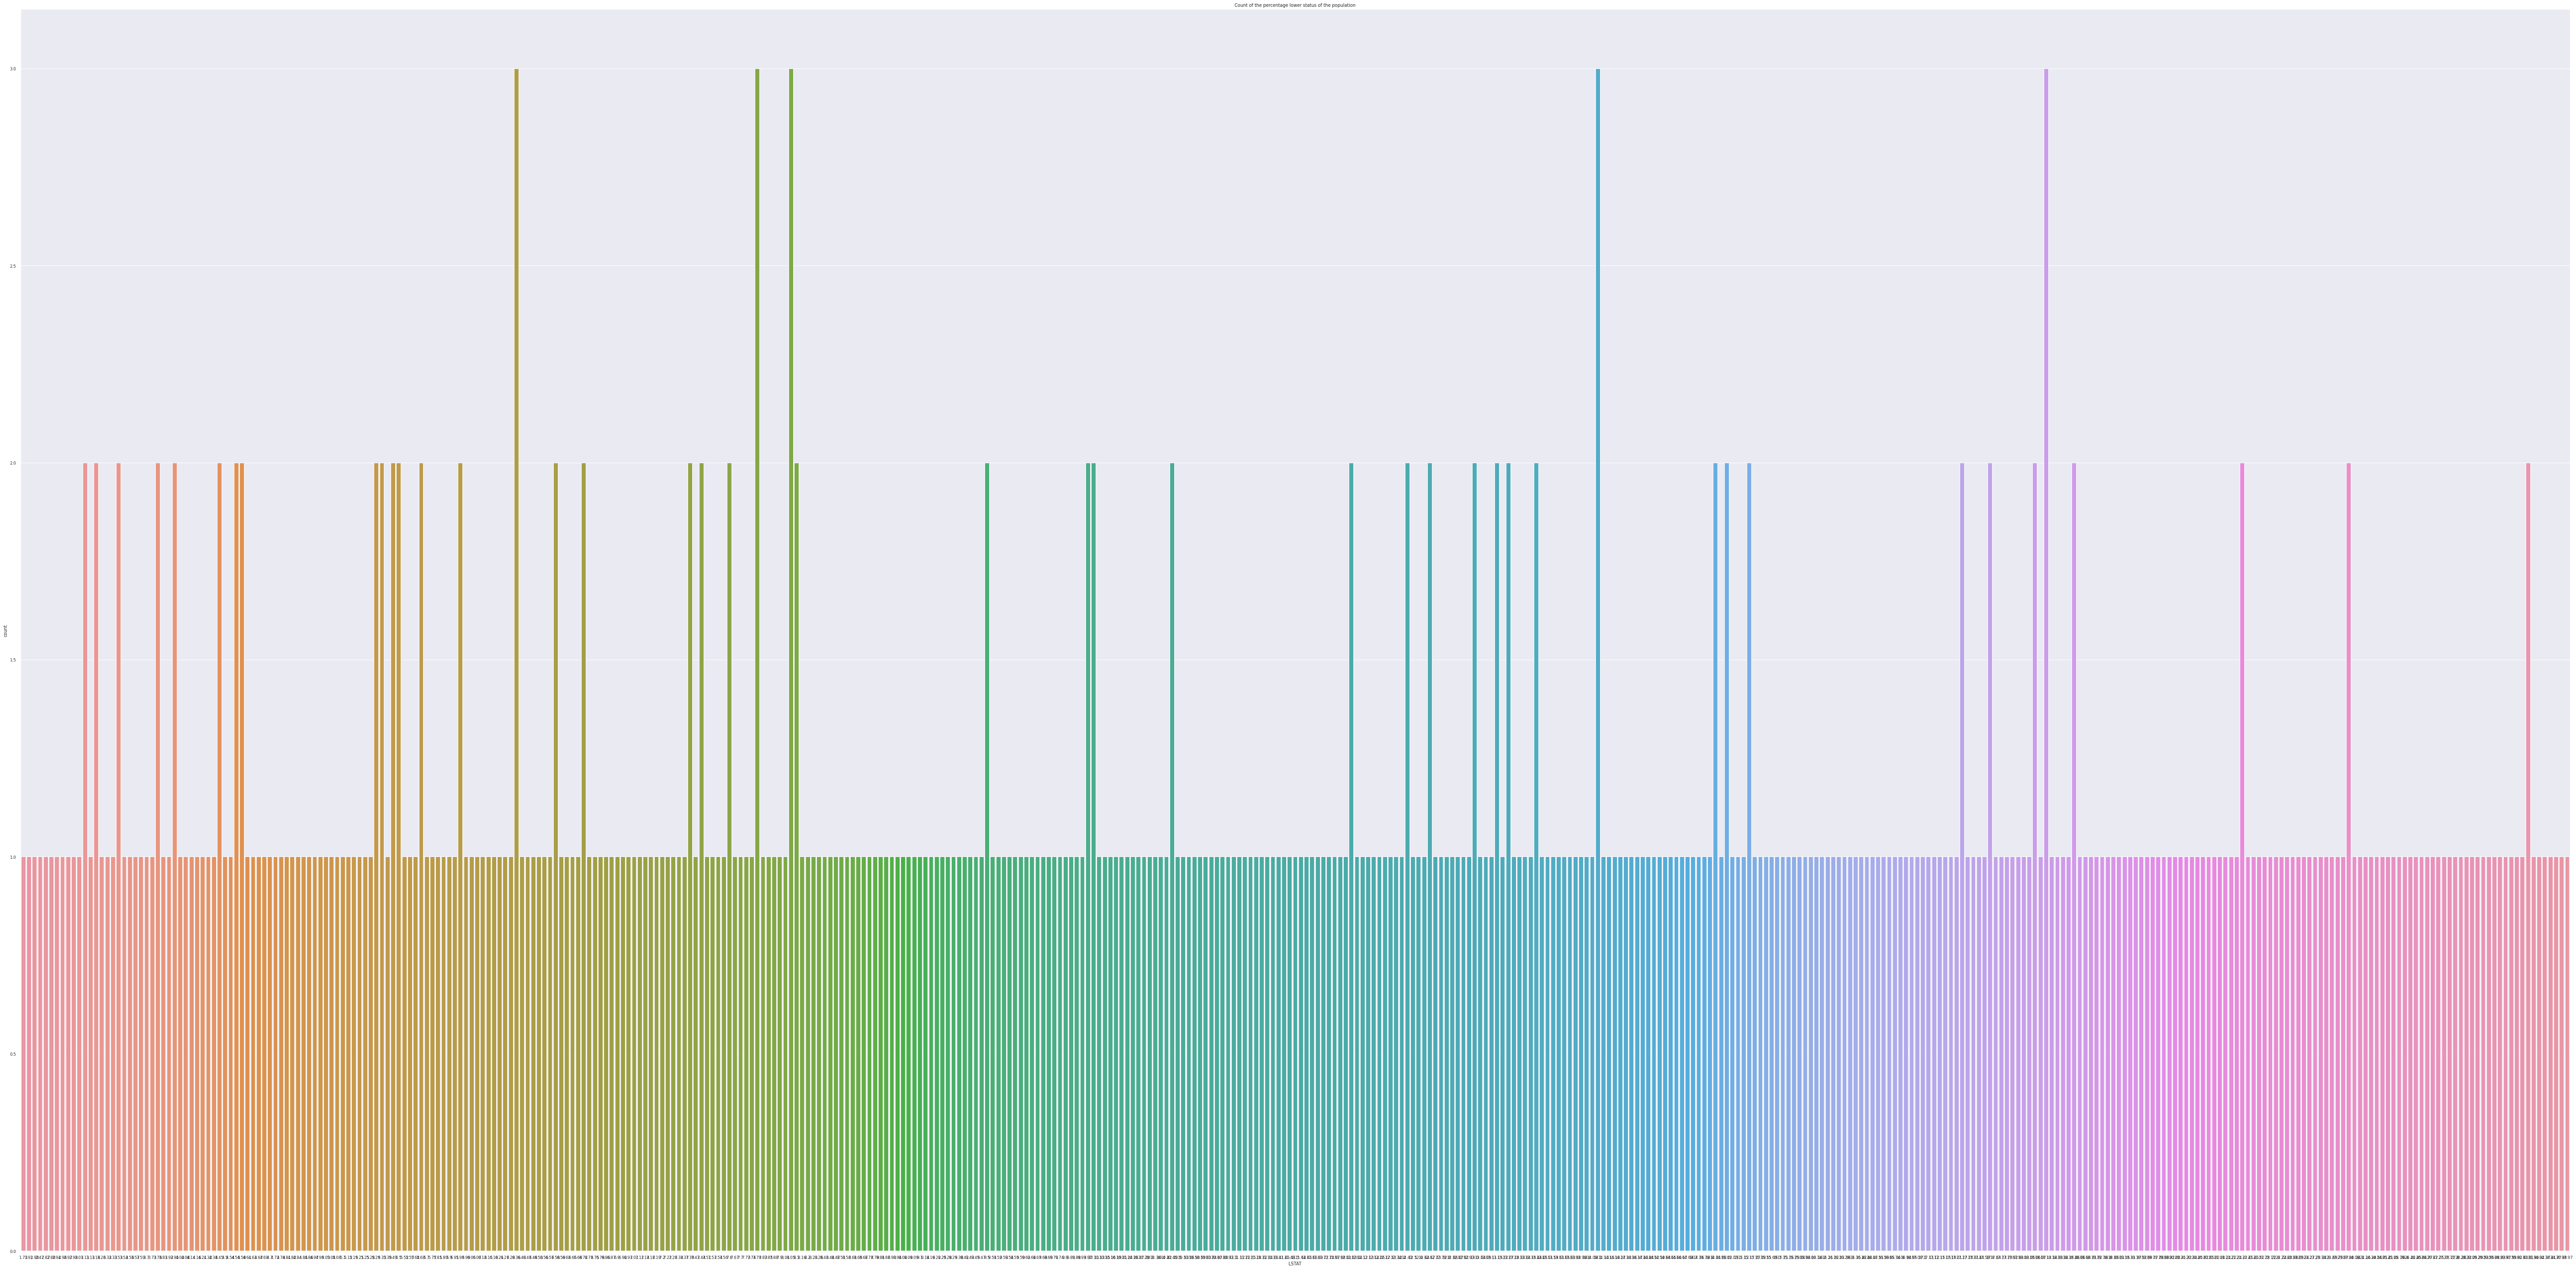

In [ ]:
plt.figure(figsize=(100,50))
sns.countplot(housing_data_cleaned['LSTAT']).set_title('Count of the percentage lower status of the population')

Bivariate Analysis

In [ ]:
housing_data_cleaned.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'Black', 'LSTAT', 'MEDV'],
      dtype='object')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

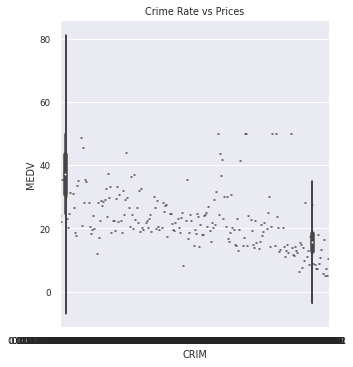

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='CRIM', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

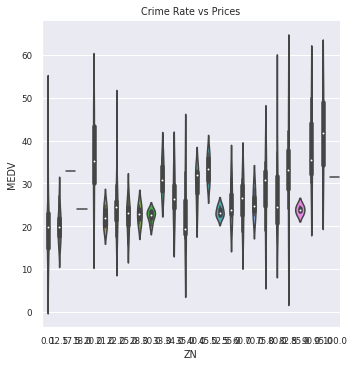

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='ZN', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('The proportion of residential land zoned for lots larger than 25,000 sq.ft vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

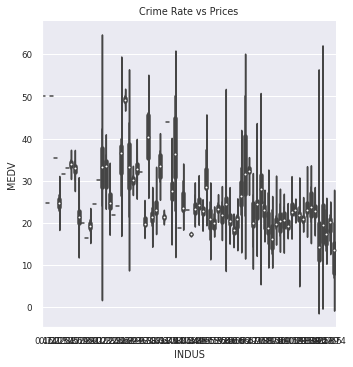

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='INDUS', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('The proportion of non-retail business acres per town vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

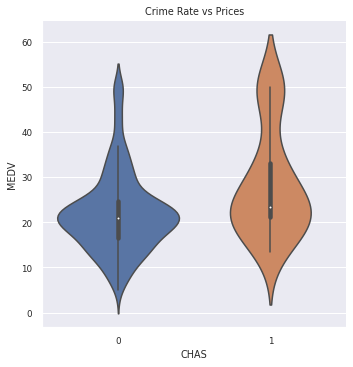

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='CHAS', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

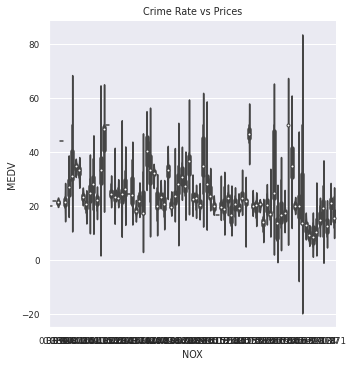

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='NOX', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

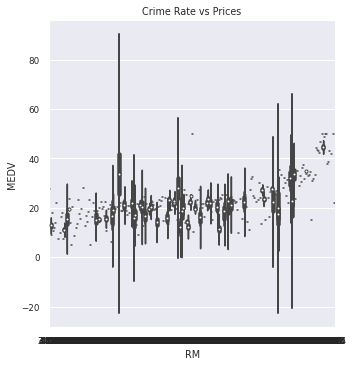

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='RM', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

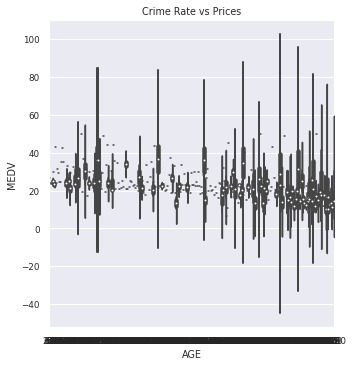

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='AGE', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

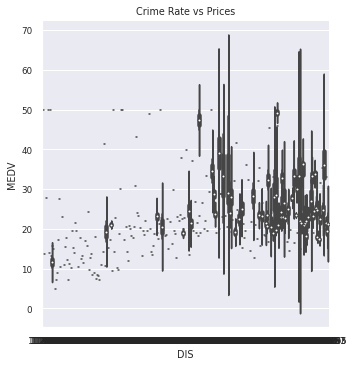

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='DIS', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

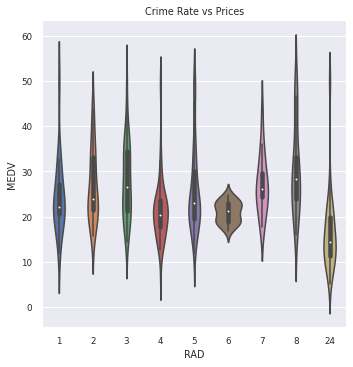

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='RAD', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

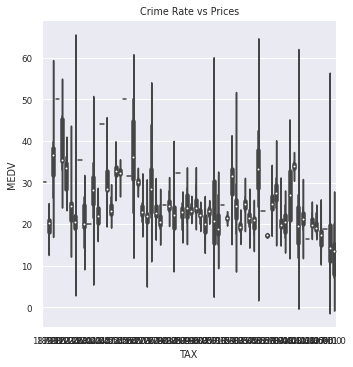

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='TAX', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

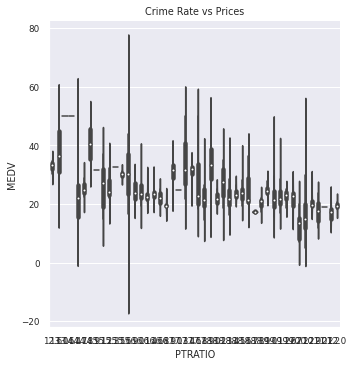

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x= 'PTRATIO', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

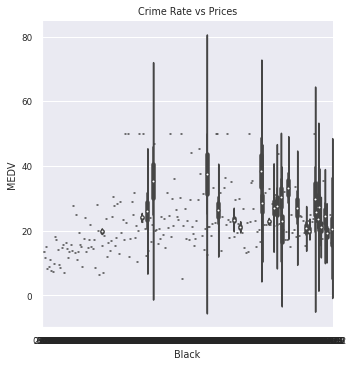

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x= 'Black', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

Text(0.5, 1.0, 'Crime Rate vs Prices')

<Figure size 7200x3600 with 0 Axes>

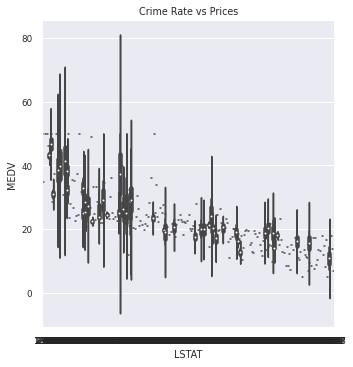

In [ ]:
plt.figure(figsize=(100,50))
sns.catplot(x='LSTAT', y='MEDV',kind="violin", data=housing_data_cleaned);
plt.title('Crime Rate vs Prices')

#Modelling

In [ ]:
# Import 'r2_score'

from sklearn.metrics import r2_score


def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between
        true (y_true) and predicted (y_predict) values based on the metric chosen. """

    score = r2_score(y_true, y_predict)

    # Return the score
    return score

In [ ]:
#Shuffle and Split Data
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")


Training and testing split was successful.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

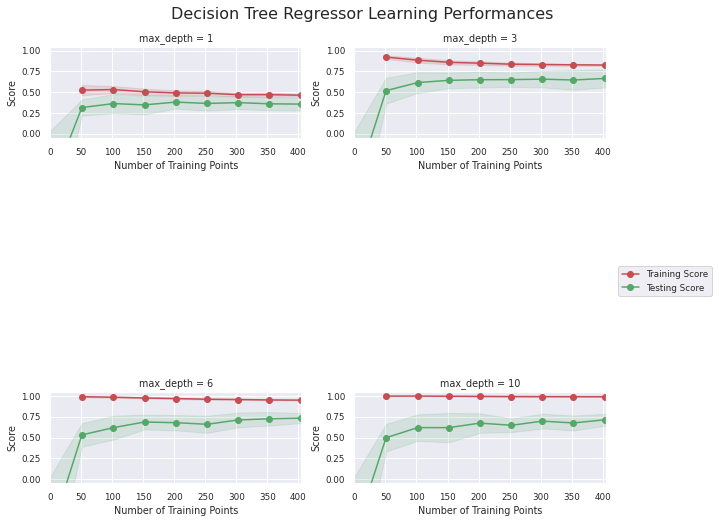

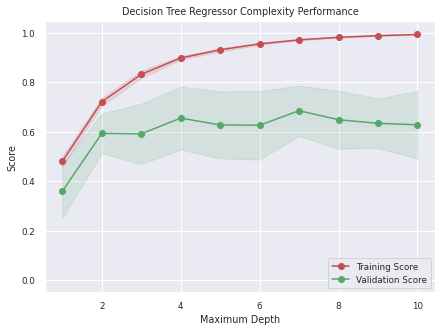

In [ ]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

# Produce complexity curve for varying training set sizes and maximum depths
vs.ModelComplexity(X_train, y_train)

#Cross - Validation

In [ ]:
# Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

In [ ]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer'
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)


In [ ]:
# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 7 for the optimal model.


In [ ]:
# Produce a matrix for client data
client_data = [[ 0.0052, 17.00,  2.510,  0 ,0.540,  6.60 , 65.2 ,4.3900,  1,  300.0 , 15.30, 986.90,   4.95],
[ 0.0092, 19.00,  5.510,  0 ,0.640,  8.60 , 90.2 ,4.5300,  1,  307.0 , 19.30, 576.90,   4.92],
[ 0.0032, 15.00,  2.310,  0 ,0.940,  2.60 , 45.2 ,2.3900,  1,  280.0 , 14.30, 836.90,   4.88]
]

In [ ]:
# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $33.17
Predicted selling price for Client 2's home: $39.25
Predicted selling price for Client 3's home: $11.90


In [ ]:
#Model’s Sensitivity
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $24.05
Trial 2: $23.75
Trial 3: $26.51
Trial 4: $27.02
Trial 5: $27.64
Trial 6: $24.00
Trial 7: $30.81
Trial 8: $29.39
Trial 9: $30.38
Trial 10: $23.44

Range in prices: $7.38
